# Cognitive And Psychological Networks project - <ins>Part B</ins>:<br> <br>

# INFJ(Introverts) Vs ENFJ(Extroverts): Semantic networks differences

## Phase 1: Data Sampling

In [1]:
import praw

username = "AdDue6044"
clientid = "P-5rQFXXogvdNkAl2wLk8A"
clientsecret = "w7FDSDyQT8pxTrnFYsPGvoDinPU6-g"

reddit = praw.Reddit(client_id=clientid,
                     client_secret=clientsecret,
                     user_agent='praw_tutorial (by {})'.format(username))



Version 7.7.0 of praw is outdated. Version 7.7.1 was released Tuesday July 11, 2023.


In [2]:
import pandas as pd
from datetime import datetime

infj_top = reddit.subreddit("infj").top(limit=1000)

In [3]:
infj_top_list = []
for post in infj_top:
    if post.selftext:  # Check if post text is not empty
        infj_top_list.append(post.selftext)
print(len(infj_top_list))
infj_top_100_list = infj_top_list[:100]
print(len(infj_top_100_list))

729
100


In [4]:
infj_top_df = pd.DataFrame(infj_top_100_list, index =range(len(infj_top_100_list))
                               ,columns =['Post_text'])
infj_top_df

,Post_text
0,"If someone is more introverted than me, I turn..."
1,It took me a long time to work up the courage ...
2,I feel as if most of the INFJ’s on this sub ar...
3,I think about this often and it weighs on me a...
4,I have it a lot where I'm imagining having a c...
...,...
95,I feel like I would be way more comfortable ta...
96,I know it’s not realistic but I wish we could ...
97,I often times just don’t feel like I fit into ...
98,"Dear INFJs, this was kind of my reflection tim..."


In [5]:
enfj_top = reddit.subreddit("enfj").top(limit=1000)

In [6]:
enfj_top_list = []
for post in enfj_top:
    if post.selftext:  # Check if post text is not empty
        enfj_top_list.append(post.selftext)
print(len(enfj_top_list))
enfj_top_100_list = enfj_top_list[:100]
print(len(enfj_top_100_list))

245
100


In [7]:
enfj_top_df = pd.DataFrame(enfj_top_100_list, index =range(len(enfj_top_100_list))
                               ,columns =['Post_text'])
enfj_top_df

,Post_text
0,"So I overthink things, worry that people won’t..."
1,and thats why I love yall <3
2,Hi ENFJ's. I'm not sure who's reading this rig...
3,Congratulations! You have been chosen by an EN...
4,I threw a party for some friends this weekend ...
...,...
95,INFJ here. I just want to say that I’m really ...
96,The number of times a day I feel the need to s...
97,"I mean, we must right? Because we’re never goo..."
98,.\n.\n.\n.\n.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...


in this phase we simply sampled hottest 1000 posts of each subreddit, then we took the first 100 posts that were not empty from each one.

## Phase 2: Data Preproccessing and cleaning

In [8]:
# saving copies for possible NER node selection
infj_top_df_NER = infj_top_df.copy()
enfj_top_df_NER = enfj_top_df.copy()


### 2.1 Tokenize

In [9]:
import nltk
from nltk.tokenize import word_tokenize

#infj_top_df = infj_top_df.drop(columns = ['Post_text_tokenize'])
#enfj_top_df = enfj_top_df.drop(columns = ['Post_text_tokenize'])

# make everything lower case and then seperate text into words 
infj_top_df["Post_text_tokenize"] = infj_top_df["Post_text"].apply(lambda x: word_tokenize(x.lower())) 


enfj_top_df["Post_text_tokenize"] = enfj_top_df["Post_text"].apply(lambda x: word_tokenize(x.lower())) 




In [10]:
print('Before tokenization\n' + str(infj_top_df["Post_text"][6]))
print('\nAfter tokenization\n' + str(infj_top_df["Post_text_tokenize"][6]))


Before tokenization
When you're EXTREMELY comfortable with an individual, do you find yourself acting more child-like with them? Examples: perhaps more expressive, emotional, clingy, innocent, naive, pouty? None of this seriously of course, just... more in a playful way. 

Thanks as always for indulging my curiosity. 😜

After tokenization
['when', 'you', "'re", 'extremely', 'comfortable', 'with', 'an', 'individual', ',', 'do', 'you', 'find', 'yourself', 'acting', 'more', 'child-like', 'with', 'them', '?', 'examples', ':', 'perhaps', 'more', 'expressive', ',', 'emotional', ',', 'clingy', ',', 'innocent', ',', 'naive', ',', 'pouty', '?', 'none', 'of', 'this', 'seriously', 'of', 'course', ',', 'just', '...', 'more', 'in', 'a', 'playful', 'way', '.', 'thanks', 'as', 'always', 'for', 'indulging', 'my', 'curiosity', '.', '😜']


In [11]:
print('Before tokenization\n' + str(enfj_top_df["Post_text"][0]))
print('\nAfter tokenization\n' + str(enfj_top_df["Post_text_tokenize"][0]))

Before tokenization
So I overthink things, worry that people won’t like me, and re-read messages that I sent or go over past conversations in my head, but at the same time, I never actually let those worries stop me from doing the things I want to do. I can confidently talk in front of large groups of people, manage teams, and am very social and love meeting new people. 

Anyone else like this? 😂

Also just told a guy that I liked him, without knowing how he felt about me! I was so nervous about it ahead of time, but actually felt relief once I told him. 😅

After tokenization
['so', 'i', 'overthink', 'things', ',', 'worry', 'that', 'people', 'won', '’', 't', 'like', 'me', ',', 'and', 're-read', 'messages', 'that', 'i', 'sent', 'or', 'go', 'over', 'past', 'conversations', 'in', 'my', 'head', ',', 'but', 'at', 'the', 'same', 'time', ',', 'i', 'never', 'actually', 'let', 'those', 'worries', 'stop', 'me', 'from', 'doing', 'the', 'things', 'i', 'want', 'to', 'do', '.', 'i', 'can', 'confiden

### 2.2 Tagging and droping irrelevant formats

In [12]:
def noun_tagging(text):
    tagged = nltk.pos_tag(text)
    #nouns = [word for word, pos in tagged if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    relevant_tags = [word for word, pos in tagged if pos not in ['CC', 'CD', 'DT', 'IN','MD','PDT']]
    return relevant_tags

In [13]:
# infj_top_df = infj_top_df.drop(columns = ['Post_text_tokenize_tag'])
# enfj_top_df = enfj_top_df.drop(columns = ['Post_text_tokenize_tag'])

infj_top_df["Post_text_tokenize_tag"] = infj_top_df["Post_text_tokenize"].apply(noun_tagging)
enfj_top_df["Post_text_tokenize_tag"] = enfj_top_df["Post_text_tokenize"].apply(noun_tagging) 


print('Before tagging and removing non-nouns:\n', str(infj_top_df["Post_text_tokenize"][6])) 
print("length before removing irrelevant tags: ",len(infj_top_df["Post_text_tokenize"][6]))
print('\nAfter removal\n' + str(infj_top_df["Post_text_tokenize_tag"][6]))
print("length after removing irrelevant tags: ", len(infj_top_df["Post_text_tokenize_tag"][6]))


Before tagging and removing non-nouns:
 ['when', 'you', "'re", 'extremely', 'comfortable', 'with', 'an', 'individual', ',', 'do', 'you', 'find', 'yourself', 'acting', 'more', 'child-like', 'with', 'them', '?', 'examples', ':', 'perhaps', 'more', 'expressive', ',', 'emotional', ',', 'clingy', ',', 'innocent', ',', 'naive', ',', 'pouty', '?', 'none', 'of', 'this', 'seriously', 'of', 'course', ',', 'just', '...', 'more', 'in', 'a', 'playful', 'way', '.', 'thanks', 'as', 'always', 'for', 'indulging', 'my', 'curiosity', '.', '😜']
length before removing irrelevant tags:  59

After removal
['when', 'you', "'re", 'extremely', 'comfortable', 'individual', ',', 'do', 'you', 'find', 'yourself', 'acting', 'more', 'child-like', 'them', '?', 'examples', ':', 'perhaps', 'more', 'expressive', ',', 'emotional', ',', 'clingy', ',', 'innocent', ',', 'naive', ',', 'pouty', '?', 'none', 'seriously', 'course', ',', 'just', '...', 'more', 'playful', 'way', '.', 'thanks', 'always', 'indulging', 'my', 'curiosi

### 2.3 Removing stopwords and punctuation

In [14]:
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')  # list of stop words from nltk library

In [15]:
def clean_text(text):
    # remove stop words and punctuation
    filtered_text=[]
    for word in text:
        if word not in stop_words and word.isalnum(): # word.isalnum - check if words are not panctuations marks (i.e., alphabets or numbers)
            filtered_text.append(word)
    return filtered_text
#infj_top_df = infj_top_df.drop(columns = ['Post_text_clean'])
#enfj_top_df = enfj_top_df.drop(columns = ['Post_text_clean'])

infj_top_df["Post_text_clean"] = infj_top_df["Post_text_tokenize_tag"].apply(clean_text)
enfj_top_df["Post_text_clean"] = enfj_top_df["Post_text_tokenize_tag"].apply(clean_text) 


print('Before removal\n' + str(infj_top_df["Post_text_tokenize_tag"][6]))
print("length before removal: ",len(infj_top_df["Post_text_tokenize_tag"][6]))

print('\nAfter removal\n' + str(infj_top_df["Post_text_clean"][6]))
print("length after removal: ",len(infj_top_df["Post_text_clean"][6]))


Before removal
['when', 'you', "'re", 'extremely', 'comfortable', 'individual', ',', 'do', 'you', 'find', 'yourself', 'acting', 'more', 'child-like', 'them', '?', 'examples', ':', 'perhaps', 'more', 'expressive', ',', 'emotional', ',', 'clingy', ',', 'innocent', ',', 'naive', ',', 'pouty', '?', 'none', 'seriously', 'course', ',', 'just', '...', 'more', 'playful', 'way', '.', 'thanks', 'always', 'indulging', 'my', 'curiosity', '.', '😜']
length before removal:  49

After removal
['extremely', 'comfortable', 'individual', 'find', 'acting', 'examples', 'perhaps', 'expressive', 'emotional', 'clingy', 'innocent', 'naive', 'pouty', 'none', 'seriously', 'course', 'playful', 'way', 'thanks', 'always', 'indulging', 'curiosity']
length after removal:  22


### 2.4 Lemmatization and stemming

In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

lemmatizer = WordNetLemmatizer()
#stemmer = PorterStemmer()
stemmer = SnowballStemmer('english')

In [17]:
lemmatizer.lemmatize('rocks')

'rock'

In [18]:
stemmer.stem('extremely')

'extrem'

In [19]:
def lemmatize_stem_words(words_list):
    words_list = [stemmer.stem(word) for word in words_list]
    words_list = [lemmatizer.lemmatize(word) for word in words_list]
    return words_list

#infj_top_df = infj_top_df.drop(columns = ['Post_text_final'])
#enfj_top_df = enfj_top_df.drop(columns = ['Post_text_final'])

infj_top_df["Post_text_final"] = infj_top_df["Post_text_clean"].apply(lemmatize_stem_words)
enfj_top_df["Post_text_final"] = enfj_top_df["Post_text_clean"].apply(lemmatize_stem_words) 


print('Before removal\n' + str(infj_top_df["Post_text_clean"][6]))
print('\nAfter removal\n' + str(infj_top_df["Post_text_final"][6]))

Before removal
['extremely', 'comfortable', 'individual', 'find', 'acting', 'examples', 'perhaps', 'expressive', 'emotional', 'clingy', 'innocent', 'naive', 'pouty', 'none', 'seriously', 'course', 'playful', 'way', 'thanks', 'always', 'indulging', 'curiosity']

After removal
['extrem', 'comfort', 'individu', 'find', 'act', 'exampl', 'perhap', 'express', 'emot', 'clingi', 'innoc', 'naiv', 'pouti', 'none', 'serious', 'cours', 'play', 'way', 'thank', 'alway', 'indulg', 'curio']


In [20]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [21]:
infj_words = [word for words_lst in infj_top_df["Post_text_final"].tolist() for word in words_lst]
infj_dist = FreqDist(infj_words)
infj_dist_df = pd.DataFrame(infj_dist.items(), columns=['word', 'frequency'])
infj_dist_df = infj_dist_df.sort_values(by='frequency', ascending=False)
infj_dist_df_15 = infj_dist_df[0:15]

enfj_words = [word for words_lst in enfj_top_df["Post_text_final"].tolist() for word in words_lst]
enfj_dist = FreqDist(enfj_words)
enfj_dist_df = pd.DataFrame(enfj_dist.items(), columns=['word', 'frequency'])
enfj_dist_df = enfj_dist_df.sort_values(by='frequency', ascending=False)
enfj_dist_df_15 = enfj_dist_df[0:15]


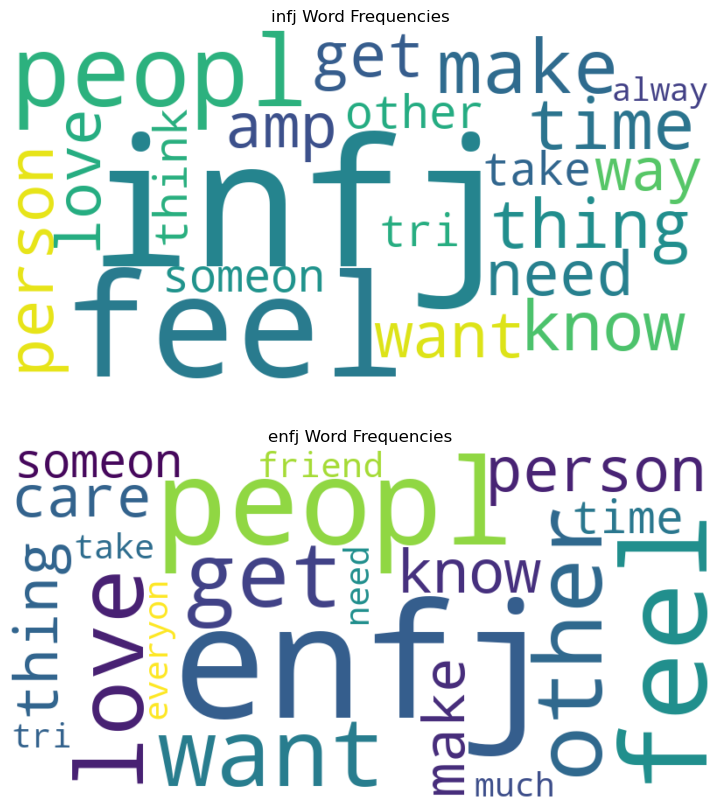

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

infj_dist_df_30 = infj_dist_df[0:20]
enfj_dist_df_30 = enfj_dist_df[0:20]

# Convert your dataframe into a dictionary
words_infj = infj_dist_df_30.set_index('word').to_dict()['frequency']
words_enfj = enfj_dist_df_30.set_index('word').to_dict()['frequency']

# Create wordclouds
wordcloud1 = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(words_infj)
wordcloud2 = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(words_enfj)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis('off')  # Remove the axis
ax1.set_title('infj Word Frequencies')

ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis('off')  # Remove the axis
ax2.set_title('enfj Word Frequencies')

plt.show()


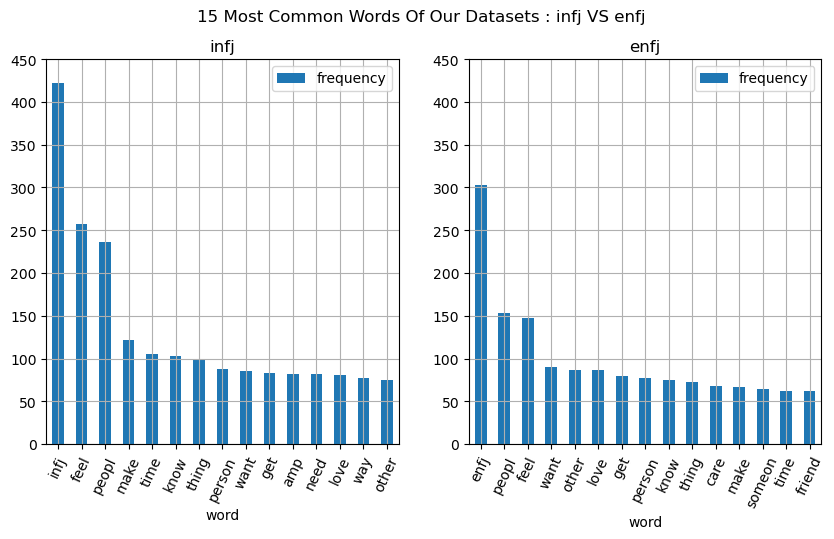

In [23]:
fig, axs = plt.subplots(1,2)

infj_dist_df_15.plot(kind='bar', x='word', y='frequency',ax=axs[0],rot=65,grid=True,legend=True)
enfj_dist_df_15.plot(kind='bar', x='word', y='frequency',ax=axs[1],rot=65,grid=True,legend=True)

fig.set_size_inches(10 ,5)
fig.suptitle('15 Most Common Words Of Our Datasets : infj VS enfj')
#axs.set_xticklabels(axs[0].get_xticklabels(), rotation=45);
#axs[0].get_legend().set_visible(False)
axs[0].set_title('infj')
axs[1].set_title('enfj')

axs[0].set_ylim(0, 450)
axs[1].set_ylim(0, 450);

## Phase 3: Node Selection

In [24]:
enfj_top_150 = enfj_dist_df[0:150]
infj_top_150 = infj_dist_df[0:150]

enfj_top_150_list = enfj_top_150['word'].tolist()
infj_top_150_list = infj_top_150['word'].tolist()
mutually_common = list(set(enfj_top_150_list).intersection(set(infj_top_150_list)))
print("number of mutual words of the two groups among their 150 most common words: ", len(mutually_common))
print("first 10 mutually common words:")
mutually_common[:10]

number of mutual words of the two groups among their 150 most common words:  103
first 10 mutually common words:


['mode',
 'seem',
 'plea',
 'read',
 'el',
 'say',
 'situat',
 'human',
 'type',
 'thank']

#### Interestingly enough - we got that out of 150 most common words of each subreddit, 103 were mutual! so we saw this as an opportunity to choose this set of words to be our nodes in order to examine the differences in the structure of the semantic networks we will make based on these nodes.

## Repeating Phase 2: Data Preproccessing and cleaning but this time while pointing out entities in our text

In [25]:
from nltk.tokenize import sent_tokenize

In [26]:
def sentence_tokenize(sentence):
    return sent_tokenize(sentence)

In [27]:
infj_top_df_NER['Post_text']

0     If someone is more introverted than me, I turn...
1     It took me a long time to work up the courage ...
2     I feel as if most of the INFJ’s on this sub ar...
3     I think about this often and it weighs on me a...
4     I have it a lot where I'm imagining having a c...
                            ...                        
95    I feel like I would be way more comfortable ta...
96    I know it’s not realistic but I wish we could ...
97    I often times just don’t feel like I fit into ...
98    Dear INFJs, this was kind of my reflection tim...
99    In my whole life, I've never seen such a commu...
Name: Post_text, Length: 100, dtype: object

In [28]:
# infj_top_df_NER = infj_top_df_NER.drop(columns = 'Post_text_sent_tokenize')
# enfj_top_df_NER = enfj_top_df_NER.drop(columns = 'Post_text_sent_tokenize')

infj_top_df_NER["Post_text_sent_tokenize"] = infj_top_df_NER["Post_text"].apply(sentence_tokenize)

enfj_top_df_NER["Post_text_sent_tokenize"] = enfj_top_df_NER["Post_text"].apply(sentence_tokenize)

print('Before tokenization\n' + str(infj_top_df_NER["Post_text"][6]))
print('\nAfter tokenization\n' + str(infj_top_df_NER["Post_text_sent_tokenize"][6]))


Before tokenization
When you're EXTREMELY comfortable with an individual, do you find yourself acting more child-like with them? Examples: perhaps more expressive, emotional, clingy, innocent, naive, pouty? None of this seriously of course, just... more in a playful way. 

Thanks as always for indulging my curiosity. 😜

After tokenization
["When you're EXTREMELY comfortable with an individual, do you find yourself acting more child-like with them?", 'Examples: perhaps more expressive, emotional, clingy, innocent, naive, pouty?', 'None of this seriously of course, just... more in a playful way.', 'Thanks as always for indulging my curiosity.', '😜']


In [29]:
def word_sentence_tokenize(sentence_list):
    tokenized_words_per_sentence_list = []
    for sentence in sentence_list:
        tokenized_words_per_sentence_list.append(word_tokenize(sentence.lower()))
    return tokenized_words_per_sentence_list

In [30]:

# infj_top_df_NER = infj_top_df_NER.drop(columns = 'Post_text_tokenize')
# enfj_top_df_NER = enfj_top_df_NER.drop(columns = 'Post_text_tokenize')

# make everything lower case and then seperate text into words 
infj_top_df_NER["Post_text_tokenize"] = infj_top_df_NER["Post_text_sent_tokenize"].apply(word_sentence_tokenize)


enfj_top_df_NER["Post_text_tokenize"] = enfj_top_df_NER["Post_text_sent_tokenize"].apply(word_sentence_tokenize) 




In [31]:
print('Before tokenization\n' + str(infj_top_df_NER["Post_text_sent_tokenize"][6]))
print('\nAfter tokenization\n' + str(infj_top_df_NER["Post_text_tokenize"][6]))


Before tokenization
["When you're EXTREMELY comfortable with an individual, do you find yourself acting more child-like with them?", 'Examples: perhaps more expressive, emotional, clingy, innocent, naive, pouty?', 'None of this seriously of course, just... more in a playful way.', 'Thanks as always for indulging my curiosity.', '😜']

After tokenization
[['when', 'you', "'re", 'extremely', 'comfortable', 'with', 'an', 'individual', ',', 'do', 'you', 'find', 'yourself', 'acting', 'more', 'child-like', 'with', 'them', '?'], ['examples', ':', 'perhaps', 'more', 'expressive', ',', 'emotional', ',', 'clingy', ',', 'innocent', ',', 'naive', ',', 'pouty', '?'], ['none', 'of', 'this', 'seriously', 'of', 'course', ',', 'just', '...', 'more', 'in', 'a', 'playful', 'way', '.'], ['thanks', 'as', 'always', 'for', 'indulging', 'my', 'curiosity', '.'], ['😜']]


In [32]:
def noun_tagging_sent(sentence_list):
    tagged_words_per_sentence_list = []
    for sentence in sentence_list:
        tagged_sentence = nltk.pos_tag(sentence)
        relevant_tags = [word for word, pos in tagged_sentence if pos not in ['CC', 'CD', 'DT', 'IN','MD','PDT']]
        tagged_words_per_sentence_list.append(relevant_tags)
    return tagged_words_per_sentence_list

# infj_top_df_NER = infj_top_df_NER.drop(columns = ['Post_text_tokenize_tag'])
# enfj_top_df_NER = enfj_top_df_NER.drop(columns = ['Post_text_tokenize_tag'])

infj_top_df_NER["Post_text_tokenize_tag"] = infj_top_df_NER["Post_text_tokenize"].apply(noun_tagging_sent)
enfj_top_df_NER["Post_text_tokenize_tag"] = enfj_top_df_NER["Post_text_tokenize"].apply(noun_tagging_sent) 


print('Before tagging and removing non-nouns:\n', str(infj_top_df_NER["Post_text_tokenize"][6])) 
print("length of first entity before removing irrelevant tags: ",len(infj_top_df_NER["Post_text_tokenize"][6][0]))
print('\nAfter removal\n' + str(infj_top_df_NER["Post_text_tokenize_tag"][6]))
print("length of first entity after removing irrelevant tags: ", len(infj_top_df_NER["Post_text_tokenize_tag"][6][0]))


Before tagging and removing non-nouns:
 [['when', 'you', "'re", 'extremely', 'comfortable', 'with', 'an', 'individual', ',', 'do', 'you', 'find', 'yourself', 'acting', 'more', 'child-like', 'with', 'them', '?'], ['examples', ':', 'perhaps', 'more', 'expressive', ',', 'emotional', ',', 'clingy', ',', 'innocent', ',', 'naive', ',', 'pouty', '?'], ['none', 'of', 'this', 'seriously', 'of', 'course', ',', 'just', '...', 'more', 'in', 'a', 'playful', 'way', '.'], ['thanks', 'as', 'always', 'for', 'indulging', 'my', 'curiosity', '.'], ['😜']]
length of first entity before removing irrelevant tags:  19

After removal
[['when', 'you', "'re", 'extremely', 'comfortable', 'individual', ',', 'do', 'you', 'find', 'yourself', 'acting', 'more', 'child-like', 'them', '?'], ['examples', ':', 'perhaps', 'more', 'expressive', ',', 'emotional', ',', 'clingy', ',', 'innocent', ',', 'naive', ',', 'pouty', '?'], ['none', 'seriously', 'course', ',', 'just', '...', 'more', 'playful', 'way', '.'], ['thanks', 'alw

In [33]:
def clean_text_sent(sentence_list):
    cleaned_words_per_sentence_list = []
    for sentence in sentence_list:
        words_lst = []
        for word in sentence:
            if word not in stop_words and word.isalnum(): # word.isalnum - check if words are not panctuations marks (i.e., alphabets or numbers)
                words_lst.append(word)
        cleaned_words_per_sentence_list.append(words_lst)
    return cleaned_words_per_sentence_list

In [34]:

# infj_top_df_NER = infj_top_df_NER.drop(columns = 'Post_text_clean')
# enfj_top_df_NER = enfj_top_df_NER.drop(columns = 'Post_text_clean')

# make everything lower case and then seperate text into words 
infj_top_df_NER["Post_text_clean"] = infj_top_df_NER["Post_text_tokenize_tag"].apply(clean_text_sent)


enfj_top_df_NER["Post_text_clean"] = enfj_top_df_NER["Post_text_tokenize_tag"].apply(clean_text_sent) 




In [35]:
print('Before cleaning\n' + str(infj_top_df_NER["Post_text_tokenize"][6]))
print('\nAfter cleaning\n' + str(infj_top_df_NER["Post_text_clean"][6]))


Before cleaning
[['when', 'you', "'re", 'extremely', 'comfortable', 'with', 'an', 'individual', ',', 'do', 'you', 'find', 'yourself', 'acting', 'more', 'child-like', 'with', 'them', '?'], ['examples', ':', 'perhaps', 'more', 'expressive', ',', 'emotional', ',', 'clingy', ',', 'innocent', ',', 'naive', ',', 'pouty', '?'], ['none', 'of', 'this', 'seriously', 'of', 'course', ',', 'just', '...', 'more', 'in', 'a', 'playful', 'way', '.'], ['thanks', 'as', 'always', 'for', 'indulging', 'my', 'curiosity', '.'], ['😜']]

After cleaning
[['extremely', 'comfortable', 'individual', 'find', 'acting'], ['examples', 'perhaps', 'expressive', 'emotional', 'clingy', 'innocent', 'naive', 'pouty'], ['none', 'seriously', 'course', 'playful', 'way'], ['thanks', 'always', 'indulging', 'curiosity'], []]


In [36]:
def lemmatize_stem_words_sent(sentence_list):
    cleaned_words_per_sentence_list = []
    for sentence in sentence_list:
        words_list = [stemmer.stem(word) for word in sentence]
        words_list = [lemmatizer.lemmatize(word) for word in sentence]
        cleaned_words_per_sentence_list.append(words_list)
    return cleaned_words_per_sentence_list

In [37]:

# infj_top_df_NER = infj_top_df_NER.drop(columns = 'Post_text_clean')
# enfj_top_df_NER = enfj_top_df_NER.drop(columns = 'Post_text_clean')

# make everything lower case and then seperate text into words 
infj_top_df_NER["Post_text_final"] = infj_top_df_NER["Post_text_clean"].apply(lemmatize_stem_words_sent)


enfj_top_df_NER["Post_text_final"] = enfj_top_df_NER["Post_text_clean"].apply(lemmatize_stem_words_sent) 




In [38]:
print('Before stemming\n' + str(infj_top_df_NER["Post_text_clean"][6][1][0]))
print('\nAfter stemming\n' + str(infj_top_df_NER["Post_text_final"][6][1][0]))


Before stemming
examples

After stemming
example


## Phase 4: Edge creation and Weight Assigning

In [39]:
infj_Co_Occourences_dict = {}

# Iterate through each row in the DataFrame
for idx, row in infj_top_df_NER.iterrows():
    # For each list of words in the row
    for words_list in row['Post_text_final']:
        # Only consider words that are in the mutually_common list
        common_words = [word for word in words_list if word in mutually_common]
        
        # If there are 2 or more common words, get pairs and increment count in dict
        if len(common_words) >= 2:
            for i in range(len(common_words)):
                for j in range(i + 1, len(common_words)):
                    # Sort the pair to ensure consistent key (word1, word2) = (word2, word1)
                    if common_words[i] != common_words[j]:    
                        pair = tuple(sorted((common_words[i], common_words[j])))
                        if pair in infj_Co_Occourences_dict.keys():
                            infj_Co_Occourences_dict[pair] += 1
                        else:
                            infj_Co_Occourences_dict[pair] = 1

In [40]:
from itertools import islice

def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

In [41]:
print("number of word pairs formed in the infj network:  ",len(infj_Co_Occourences_dict))
print("\n")
print("an example of the first 10 pairs of infj Co-Occourance pairs:\n")
take(10, infj_Co_Occourences_dict.items()) 

number of word pairs formed in the infj network:   1564


an example of the first 10 pairs of infj Co-Occourance pairs:



[(('long', 'time'), 15),
 (('long', 'work'), 6),
 (('long', 'post'), 2),
 (('time', 'work'), 10),
 (('post', 'time'), 10),
 (('post', 'work'), 1),
 (('know', 'life'), 9),
 (('know', 'world'), 5),
 (('life', 'world'), 11),
 (('good', 'know'), 2)]

In [42]:
enfj_Co_Occourences_dict = {}

# Iterate through each row in the DataFrame
for idx, row in enfj_top_df_NER.iterrows():
    # For each list of words in the row
    for words_list in row['Post_text_final']:
        # Only consider words that are in the mutually_common list
        common_words = [word for word in words_list if word in mutually_common]
        
        # If there are 2 or more common words, get pairs and increment count in dict
        if len(common_words) >= 2:
            for i in range(len(common_words)):
                for j in range(i + 1, len(common_words)):
                    # Sort the pair to ensure consistent key (word1, word2) = (word2, word1)
                    pair = tuple(sorted((common_words[i], common_words[j])))
                    if common_words[i] != common_words[j]:    
                        pair = tuple(sorted((common_words[i], common_words[j])))
                        if pair in enfj_Co_Occourences_dict.keys():
                            enfj_Co_Occourences_dict[pair] += 1
                        else:
                            enfj_Co_Occourences_dict[pair] = 1

In [43]:
print("number of word pairs formed in the enfj network:  ",len(enfj_Co_Occourences_dict))
print("\n")

print("an example of the first 10 pairs of enfj Co-Occourance pairs:\n")
take(10, enfj_Co_Occourences_dict.items()) 

number of word pairs formed in the enfj network:   1224


an example of the first 10 pairs of enfj Co-Occourance pairs:



[(('go', 'thing'), 3),
 (('thing', 'time'), 10),
 (('never', 'thing'), 5),
 (('let', 'thing'), 2),
 (('thing', 'want'), 9),
 (('go', 'time'), 5),
 (('go', 'never'), 3),
 (('go', 'let'), 1),
 (('go', 'want'), 1),
 (('never', 'time'), 6)]

## Phase 5: Building semantic networks 

In [44]:
import networkx as nx

infj_Graph = nx.Graph()

enfj_Graph = nx.Graph()

### adding edges to the graph in the form of :(word1, word2, Co-Occourence of word1 and word2) 
#### meaning that we defined weight to be the Co-Occourence(number of times both words appeared in the same entity)

In [45]:
# infj_Graph.clear()
# enfj_Graph.clear()
for pair, weight in infj_Co_Occourences_dict.items():
    # Add each edge with the count as weight
    infj_Graph.add_edge(pair[0], pair[1], weight=weight)

for pair, weight in enfj_Co_Occourences_dict.items():
    # Add each edge with the count as weight
    enfj_Graph.add_edge(pair[0], pair[1], weight=weight)
infj_Graph.remove_node("differ")

### Network Measurments and statistics: (number of nodes and edges, range of weights)

In [46]:
print("number of nodes in the infj graph:", infj_Graph.number_of_nodes())
print("number of edges in the infj graph:", infj_Graph.number_of_edges())
print("\n")
print("number of nodes in the enfj graph:", enfj_Graph.number_of_nodes())
print("number of edges in the enfj graph:", enfj_Graph.number_of_edges())

number of nodes in the infj graph: 78
number of edges in the infj graph: 1563


number of nodes in the enfj graph: 78
number of edges in the enfj graph: 1224


In [47]:
infj_weights = list(infj_Co_Occourences_dict.values())
infj_weights.sort()
infj_mid = len(infj_weights) // 2
infj_median =(infj_weights[infj_mid] + infj_weights[~infj_mid]) / 2

enfj_weights = list(enfj_Co_Occourences_dict.values())
enfj_weights.sort()
enfj_mid = len(enfj_weights) // 2
enfj_median =(enfj_weights[enfj_mid] + enfj_weights[~enfj_mid]) / 2

print("range of infj weights:\n")
print("biggest words pair Co_Occourence: infj vs enfj:  ", infj_weights[-1],"  ",enfj_weights[-1] )
print("median infj words pair Co_Occourence:            ", infj_median," ",enfj_median)
print("smallest infj words pair Co_Occourence:           ", infj_weights[0],"  ",enfj_weights[0])



range of infj weights:

biggest words pair Co_Occourence: infj vs enfj:   27    23
median infj words pair Co_Occourence:             2.0   1.0
smallest infj words pair Co_Occourence:            1    1


In [48]:
infj_Graph.edges[('feel', 'love')]

{'weight': 8}

In [49]:
enfj_Graph.edges[('feel', 'love')]

{'weight': 3}

in the above example we can see that in the infj network, the pair of words ('feel', 'love') appears together 7 times, in contrast to the enfj network where this pair only appears 3 times.

### Phase 6: Towards Data analyzing: towards part C of the project:<br><br>

#### <ins>Measurments to be tested</ins>:<br>
#### 1. Modularity: Modularity is a measure in which the nodes in a network are grouped together into communities. High modularity indicates that the nodes in the network are well clustered into communities, while low modularity indicates that the nodes are more randomly dispersed.<br>
#### 2. Betweenness Centrality: This is a measure of a node's importance in a network in terms of its ability to connect different communities. A node with high betweenness centrality is a node that is located on many paths between different communities.<br>
#### 3.Eigenvector Centrality: Eigenvector centrality is a measure of a node's importance in a network in terms of its connections to other important nodes. A node with high eigenvector centrality is a node that is connected to many other nodes that are themselves important.
#### So we can use these measurments to try and identify the differences between the two semantic networks of the infj and enfj groups in all the measurable aspects of difference as stated in the above measurments.<br>

#### <ins>Networks Comparison</ins>: As explained and seen, in this part we obtained two semantic networks of each of the groups which differ in the pesronality types: the first group is the subreddit of INFJ, people with the INFJ personality according to the MBTI personality test, and the second group is the same for the ENFJ personality type, as explained in part A of the project, these two personality types are identical in all of the "traits" except for the first one: I vs E (introvert vs extrovert), and so by differing only on this trait, we think that we have a relatively accurate seperation in the trait of introversion\extraversion.(based on the MBTI researches)<br><br>

#### <ins>Community Detection</ins>: we want to try and detect differenct communities within the two semantic networks, we think that community detection is relevant and can be useful to our case because of the following reasons:
#### 1. Identify Sub-Groups: If there are distinct sub-groups within each subreddit that discuss specific topics, we can identify these through community detection, because community detection in networks aims to identify tightly knitted groups of nodes with a higher-than-average number of links within them as compared to links outside of the group.
#### 2.Highlight Differences: By comparing the communities identified within each subreddit, we can better understand how the conversations differ. Perhaps certain themes are more popular or accepted in one subreddit than the other, so we beleive that identifying these differences in their converstations and in thier posts can highly testify for a difference in their semantic networks.
#### How are we going to detect these communities: NetworkX.<br>NetworkX includes several community detection algorithms, such as the Girvan-Newman algorithm, which detects communities by progressively removing edges from the original graph, so we intend to use this algorithm or other algorithms(we found several in the igraph library that we used to plot our networks) if they were a better match to our case.

## Phase 7: Visualization of the networks

achieved better visualisation using 'igraph' package:

infj initial semantic network


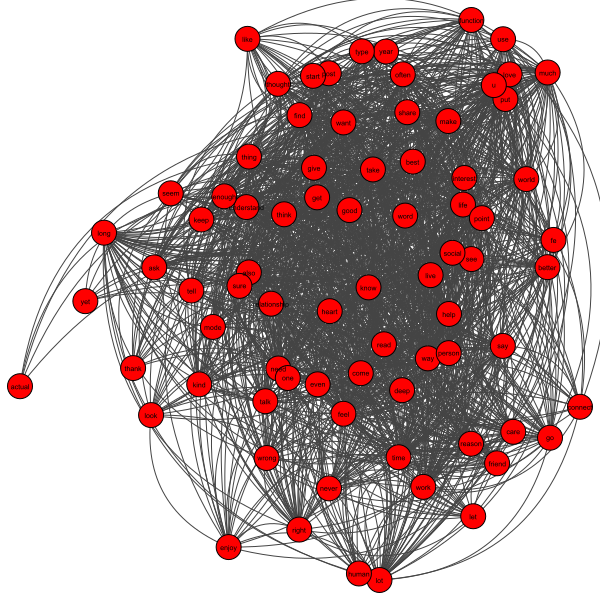

In [50]:
import igraph as ig
infj_Graph_ig = ig.Graph.from_networkx(infj_Graph)
infj_labels = list(infj_Graph.nodes())
layout = infj_Graph_ig.layout('drl')
print("infj initial semantic network")
ig.plot(infj_Graph_ig,'infj_1.png', layout = layout,vertex_label= infj_labels,vertex_size=25, vertex_label_size=7,edge_curved=True)

enfj initial semantic network


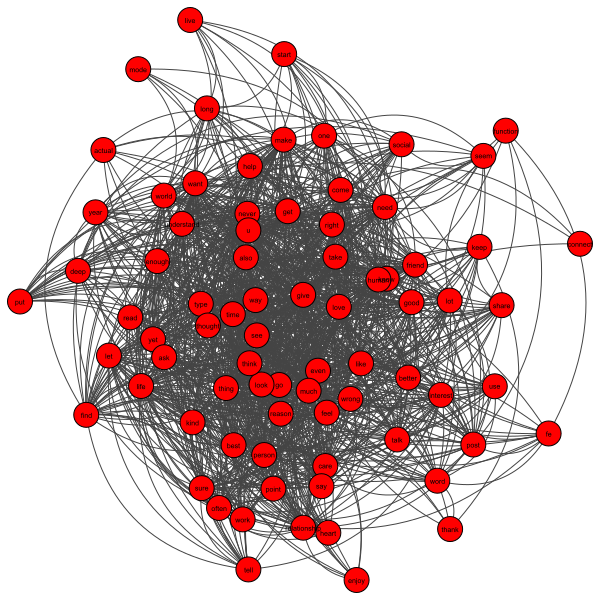

In [51]:
enfj_Graph_ig = ig.Graph.from_networkx(enfj_Graph)
enfj_labels = list(enfj_Graph.nodes())
layout = enfj_Graph_ig.layout('drl')
print("enfj initial semantic network")
ig.plot(enfj_Graph_ig, layout = layout,vertex_label= enfj_labels,vertex_size=25, vertex_label_size=7,edge_curved=True)


### Betwenness Centrality: 

In [52]:
infj_bc_centrality = nx.betweenness_centrality(infj_Graph)

infj_sorted_bc_centrality = sorted(infj_bc_centrality, key=infj_bc_centrality.get, reverse=True)

# Get the top 10 keys
top_10_keys = infj_sorted_bc_centrality[:10]
print("top 10 infj nodes sorted by highest betweenness centrality\n")
for key in top_10_keys:
    print(f"Key: {key}, Value: {infj_bc_centrality[key]}")# print the betweenness centrality of each node
# for node, cent in infj_centrality.items():
#     print(f"Node {node} has betweenness centrality {cent}")

top 10 infj nodes sorted by highest betweenness centrality

Key: feel, Value: 0.028829776957714204
Key: thing, Value: 0.023272737338592735
Key: time, Value: 0.019928477237481073
Key: want, Value: 0.019527732269186977
Key: make, Value: 0.018953691164792348
Key: take, Value: 0.018875222678121358
Key: way, Value: 0.015191835903038778
Key: know, Value: 0.01471208660301094
Key: come, Value: 0.01449882547253842
Key: think, Value: 0.013703553438214612


In [53]:
enfj_bc_centrality = nx.betweenness_centrality(enfj_Graph)

enfj_sorted_bc_centrality = sorted(enfj_bc_centrality, key=enfj_bc_centrality.get, reverse=True)

# Get the top 10 keys
top_10_keys = enfj_sorted_bc_centrality[:10]
print("top 10 enfj nodes sorted by highest betweenness centrality\n")
for key in top_10_keys:
    print(f"Key: {key}, Value: {enfj_bc_centrality[key]}")# print the betweenness centrality of each node
# for node, cent in infj_centrality.items():
#     print(f"Node {node} has betweenness centrality {cent}")

top 10 enfj nodes sorted by highest betweenness centrality

Key: feel, Value: 0.03767382894658493
Key: time, Value: 0.0277431569351732
Key: want, Value: 0.025290379676336197
Key: come, Value: 0.02402501373147217
Key: person, Value: 0.023032503314737295
Key: thing, Value: 0.02246616515512866
Key: much, Value: 0.02047266615824538
Key: get, Value: 0.02038093496907311
Key: make, Value: 0.01988059200614987
Key: need, Value: 0.019457932676143753


In [54]:
centrality_df = pd.DataFrame({
    'node': infj_sorted_bc_centrality,
})

centrality_df

,node
0,feel
1,thing
2,time
3,want
4,make
...,...
73,let
74,human
75,yet
76,thank


In [55]:
centrality_df['infj bc score'] = centrality_df['node'].apply(lambda x: infj_bc_centrality.get(x, None))
centrality_df['enfj bc score'] = centrality_df['node'].apply(lambda x: enfj_bc_centrality.get(x, None))
centrality_df

,node,infj bc score,enfj bc score
0,feel,0.028830,0.037674
1,thing,0.023273,0.022466
2,time,0.019928,0.027743
3,want,0.019528,0.025290
4,make,0.018954,0.019881
...,...,...,...
73,let,0.000600,0.004518
74,human,0.000448,0.000742
75,yet,0.000344,0.002526
76,thank,0.000200,0.000206


### Eigenvictor Centrality:

In [56]:
infj_ev_centrality = nx.eigenvector_centrality(infj_Graph)

enfj_sorted_ev_centrality = sorted(infj_ev_centrality, key=infj_ev_centrality.get, reverse=True)

# Get the top 10 keys
top_10_keys = enfj_sorted_ev_centrality[:10]
print("top 10 infj nodes sorted by highest eigenvector centrality\n")
for key in top_10_keys:
    print(f"Key: {key}, Value: {infj_ev_centrality[key]}")# print the betweenness centrality of each node
# for node, cent in infj_centrality.items():
#     print(f"Node {node} has betweenness centrality {cent}")

top 10 infj nodes sorted by highest eigenvector centrality

Key: feel, Value: 0.17665492682505618
Key: make, Value: 0.1715194244220988
Key: thing, Value: 0.16919232310283835
Key: know, Value: 0.16475961356622457
Key: time, Value: 0.16194715390145883
Key: way, Value: 0.158616676413172
Key: think, Value: 0.15719096385138154
Key: much, Value: 0.15462604076176167
Key: want, Value: 0.15279669837748067
Key: often, Value: 0.15089932919646323


In [57]:
enfj_ev_centrality = nx.eigenvector_centrality(enfj_Graph)

enfj_sorted_ev_centrality = sorted(enfj_ev_centrality, key=enfj_ev_centrality.get, reverse=True)

# Get the top 10 keys
top_10_keys = enfj_sorted_ev_centrality[:10]
print("top 10 infj nodes sorted by highest eigenvector centrality\n")
for key in top_10_keys:
    print(f"Key: {key}, Value: {enfj_ev_centrality[key]}")# print the betweenness centrality of each node
# for node, cent in infj_centrality.items():
#     print(f"Node {node} has betweenness centrality {cent}")

top 10 infj nodes sorted by highest eigenvector centrality

Key: feel, Value: 0.19475735259972018
Key: time, Value: 0.18247758274728382
Key: make, Value: 0.17106274443725625
Key: get, Value: 0.1707328862928012
Key: know, Value: 0.16973510692163304
Key: want, Value: 0.16848346798861236
Key: life, Value: 0.16721812679271947
Key: thing, Value: 0.16445068488489614
Key: never, Value: 0.16409843014253586
Key: much, Value: 0.1619921386791246


In [58]:
centrality_df['infj ev score'] = centrality_df['node'].apply(lambda x: infj_ev_centrality.get(x, None))
centrality_df['enfj ev score'] = centrality_df['node'].apply(lambda x: enfj_ev_centrality.get(x, None))
centrality_df

,node,infj bc score,enfj bc score,infj ev score,enfj ev score
0,feel,0.028830,0.037674,0.176655,0.194757
1,thing,0.023273,0.022466,0.169192,0.164451
2,time,0.019928,0.027743,0.161947,0.182478
3,want,0.019528,0.025290,0.152797,0.168483
4,make,0.018954,0.019881,0.171519,0.171063
...,...,...,...,...,...
73,let,0.000600,0.004518,0.060563,0.117604
74,human,0.000448,0.000742,0.063088,0.051604
75,yet,0.000344,0.002526,0.018150,0.118960
76,thank,0.000200,0.000206,0.040093,0.018198


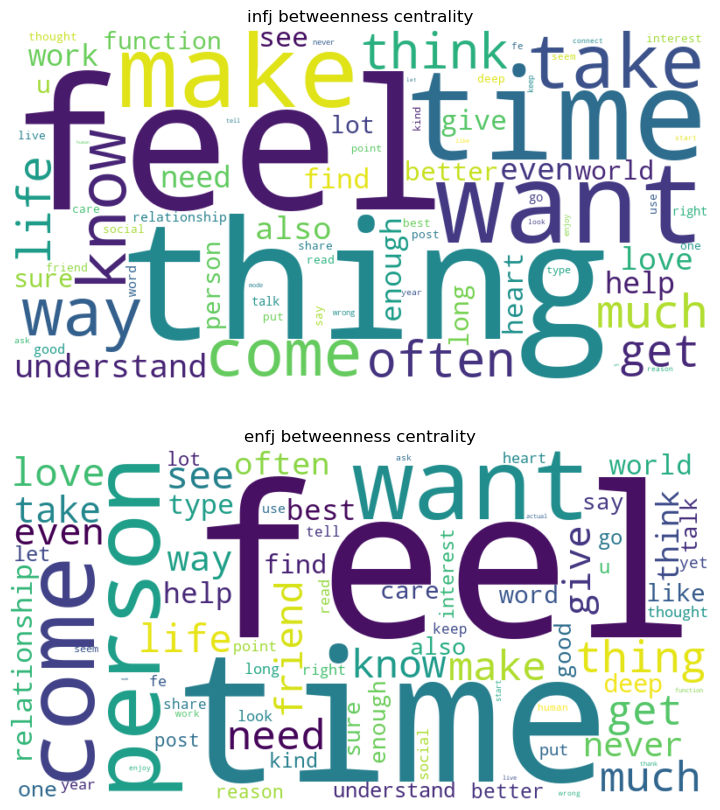

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

infj_dist_df_30 = infj_dist_df[0:20]
enfj_dist_df_30 = enfj_dist_df[0:20]

# Convert your dataframe into a dictionary
bc_scores_infj = centrality_df.set_index('node').to_dict()['infj bc score']
bc_scores_enfj = centrality_df.set_index('node').to_dict()['enfj bc score']

# Create wordclouds
wordcloud1 = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(bc_scores_infj)
wordcloud2 = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(bc_scores_enfj)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis('off')  # Remove the axis
ax1.set_title('infj betweenness centrality')

ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis('off')  # Remove the axis
ax2.set_title('enfj betweenness centrality')

plt.show()


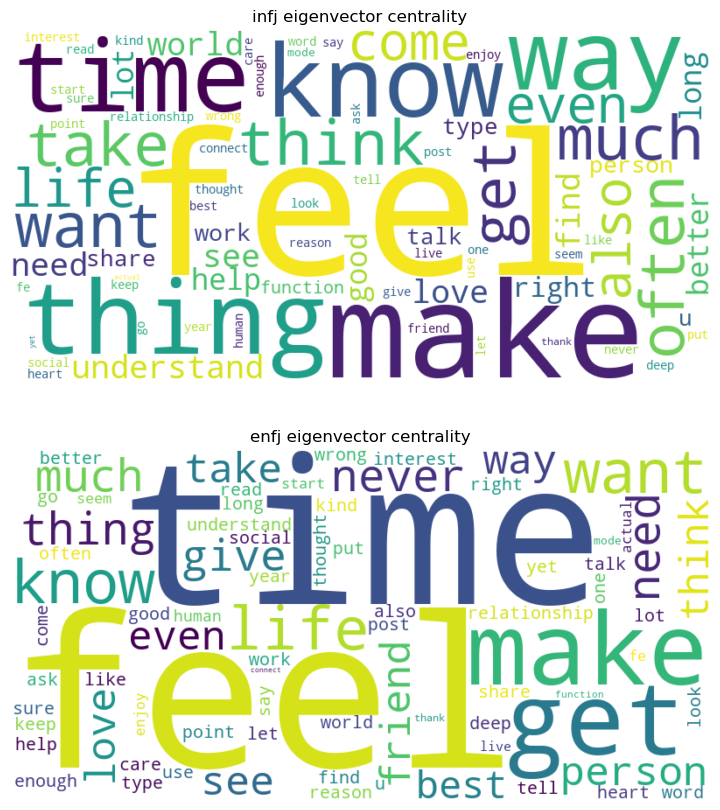

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Convert your dataframe into a dictionary
bc_scores_infj = centrality_df.set_index('node').to_dict()['infj ev score']
bc_scores_enfj = centrality_df.set_index('node').to_dict()['enfj ev score']

# Create wordclouds
wordcloud1 = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(bc_scores_infj)
wordcloud2 = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(bc_scores_enfj)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis('off')  # Remove the axis
ax1.set_title('infj eigenvector centrality')

ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis('off')  # Remove the axis
ax2.set_title('enfj eigenvector centrality')

plt.show()


<Axes: xlabel='infj bc score', ylabel='enfj bc score'>

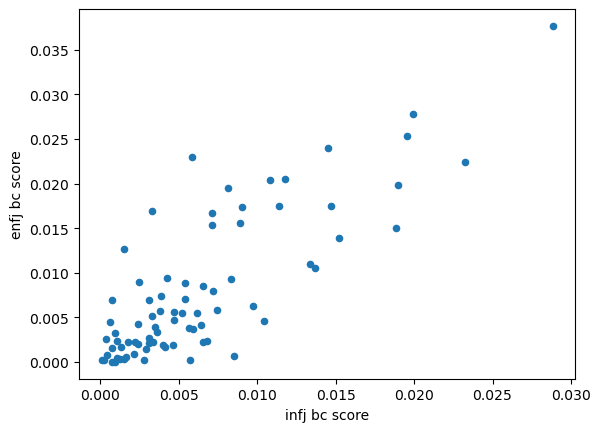

In [61]:
centrality_df.plot.scatter(x='infj bc score', y='enfj bc score')

In [62]:
centrality_df['infj bc score'].corr(centrality_df['enfj bc score'])

0.8137200484335001

<Axes: xlabel='infj ev score', ylabel='enfj ev score'>

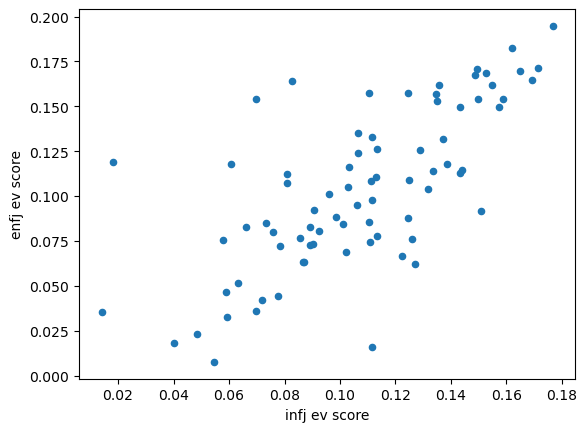

In [63]:
centrality_df.plot.scatter(x='infj ev score', y='enfj ev score')

In [64]:
centrality_df['infj ev score'].corr(centrality_df['enfj ev score'])

0.7032008630121843

In [65]:
enfj_bc_centrality_ordered = {key: enfj_bc_centrality[key] for key in infj_bc_centrality.keys()}
enfj_ev_centrality_ordered = {key: enfj_ev_centrality[key] for key in infj_ev_centrality.keys()}

### T tests of the Centrality Measurments conducted:

In [66]:
from scipy import stats

t_stat_bc, p_value_bc = stats.ttest_ind(list(infj_bc_centrality.values()), list(enfj_bc_centrality_ordered.values()))

print('t-statistic of the betweness centrality: infj vs enfj:', t_stat_bc)
print('p-value: of the betweness centrality: infj vs enfj', p_value_bc)

t-statistic of the betweness centrality: infj vs enfj: -1.4360264842734491
p-value: of the betweness centrality: infj vs enfj 0.15302300293968613


In [67]:
t_stat_ev, p_value_ev = stats.ttest_ind(list(infj_ev_centrality.values()), list(enfj_ev_centrality_ordered.values()))

print('t-statistic of the eigenvictor centrality: infj vs enfj:', t_stat_ev)
print('p-value: of the eigenvictor centrality: infj vs enfj', p_value_ev)

t-statistic of the eigenvictor centrality: infj vs enfj: 0.502339192478857
p-value: of the eigenvictor centrality: infj vs enfj 0.6161464822244922


### Community Detection: Trying several Algorithms learned in class

In [68]:
import random
def most_central_edge(G):
    centrality = nx.edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    return max(centrality, key=centrality.get)

infj_most_central_edge = most_central_edge(infj_Graph)
print("infj's most central edge:",infj_most_central_edge)

enfj_most_central_edge = most_central_edge(enfj_Graph)
print("enfj's most central edge:",enfj_most_central_edge)

infj's most central edge: ('thing', 'actual')
enfj's most central edge: ('connect', 'come')


### Girvan Newman Algorithm:

In [69]:
infj_communities_list = list(nx.community.girvan_newman(infj_Graph))
enfj_communities_list = list(nx.community.girvan_newman(enfj_Graph))


In [70]:
infj_modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(infj_Graph, infj_communities_list[k])]
        for k in range(len(infj_communities_list))
    ],
    columns=["k", "modularity"],
)

enfj_modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(enfj_Graph, enfj_communities_list[k])]
        for k in range(len(enfj_communities_list))
    ],
    columns=["k", "modularity"],
)
infj_modularity_df.head(3)

,k,modularity
0,1,-8.184665e-07
1,2,-9.785585e-05
2,3,-1.685059e-04


In [71]:
infj_modularity_df.describe()

,k,modularity
count,77.000000,77.000000
mean,39.000000,-0.000109
std,22.371857,0.009584
min,1.000000,-0.020985
25%,20.000000,-0.002283
50%,39.000000,0.003410
75%,58.000000,0.004575
max,77.000000,0.014863


In [72]:
# choosing the community with the highest modularity:
infj_best_community_idx = infj_modularity_df['modularity'].idxmax()
enfj_best_community_idx = enfj_modularity_df['modularity'].idxmax()


In [73]:
enfj_communities = enfj_communities_list[enfj_best_community_idx]
print(len(enfj_communities))
print(enfj_communities)

22
({'come', 'think', 'u', 'tell', 'point', 'let', 'deep', 'interest', 'share', 'reason', 'say', 'yet', 'world', 'social', 'friend', 'type', 'good', 'time', 'care', 'also', 'get', 'right', 'enough', 'give', 'love', 'know', 'much', 'thing', 'one', 'life', 'understand', 'like', 'make', 'put', 'take', 'relationship', 'need', 'year', 'person', 'never', 'way', 'see', 'even', 'best', 'often', 'sure', 'ask', 'thought', 'find', 'talk', 'help', 'go', 'lot', 'want', 'post', 'heart', 'feel'}, {'read'}, {'seem'}, {'thank'}, {'word'}, {'long'}, {'actual'}, {'connect'}, {'keep'}, {'better'}, {'fe'}, {'function'}, {'mode'}, {'work'}, {'start'}, {'human'}, {'enjoy'}, {'look'}, {'kind'}, {'live'}, {'wrong'}, {'use'})


In [74]:
infj_communities = infj_communities_list[infj_best_community_idx]
print(len(infj_communities))
print(infj_communities)

40
({'come', 'think', 'better', 'share', 'world', 'type', 'good', 'long', 'time', 'right', 'also', 'get', 'enough', 'love', 'know', 'much', 'thing', 'one', 'life', 'understand', 'make', 'take', 'need', 'relationship', 'person', 'way', 'see', 'even', 'best', 'often', 'work', 'find', 'talk', 'help', 'go', 'lot', 'want', 'post', 'feel'}, {'never'}, {'connect'}, {'live'}, {'heart'}, {'year'}, {'function'}, {'put'}, {'word'}, {'wrong'}, {'deep'}, {'seem'}, {'fe'}, {'kind'}, {'like'}, {'use'}, {'look'}, {'start'}, {'human'}, {'social'}, {'reason'}, {'enjoy'}, {'interest'}, {'give'}, {'care'}, {'let'}, {'read'}, {'thought'}, {'sure'}, {'keep'}, {'point'}, {'thank'}, {'say'}, {'actual'}, {'u'}, {'friend'}, {'yet'}, {'tell'}, {'ask'}, {'mode'})


In [75]:
infj_Girvan_Newman_modularity = nx.community.modularity(infj_Graph, infj_communities)
infj_Girvan_Newman_modularity

0.014863155022005638

In [76]:
enfj_Girvan_Newman_modularity = nx.community.modularity(enfj_Graph, enfj_communities)
enfj_Girvan_Newman_modularity

0.004689992584471796

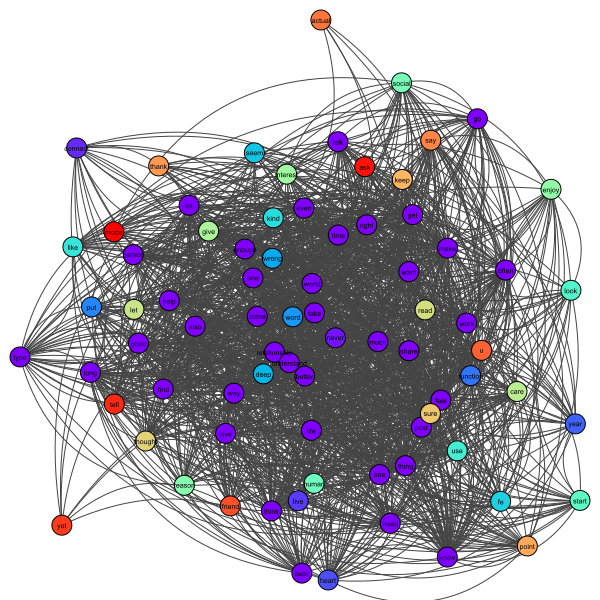

In [77]:
import igraph as ig
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Assuming `communities` is your list of communities. Each community is a list of nodes.
communities = infj_communities

# Create a color for each community using a colormap
colors = cm.rainbow(np.linspace(0, 1, len(communities)))

# Convert colors to hexadecimal
hex_colors = [mcolors.rgb2hex(color) for color in colors]

# Create a color dictionary, assigning each node to the color of its community
color_dict = {}
for i, community in enumerate(communities):
    for node in community:
        color_dict[node] = hex_colors[i]

# Create a list of colors for each node in the graph, in the same order as the nodes
node_colors = [color_dict[node] for node in infj_Graph.nodes()]

# Create an iGraph object from the NetworkX graph
infj_Graph_ig = ig.Graph.from_networkx(infj_Graph)

# Get the labels for the graph
infj_labels = list(infj_Graph.nodes())

# Get the layout for the graph
layout = infj_Graph_ig.layout('drl')

# Plot the graph with node colors corresponding to communities
ig.plot(infj_Graph_ig, layout = layout, vertex_label = infj_labels, vertex_color = node_colors, vertex_size = 20, vertex_label_size = 7, edge_curved = True)


In [78]:
# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities)
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [79]:

# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw_networkx(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )

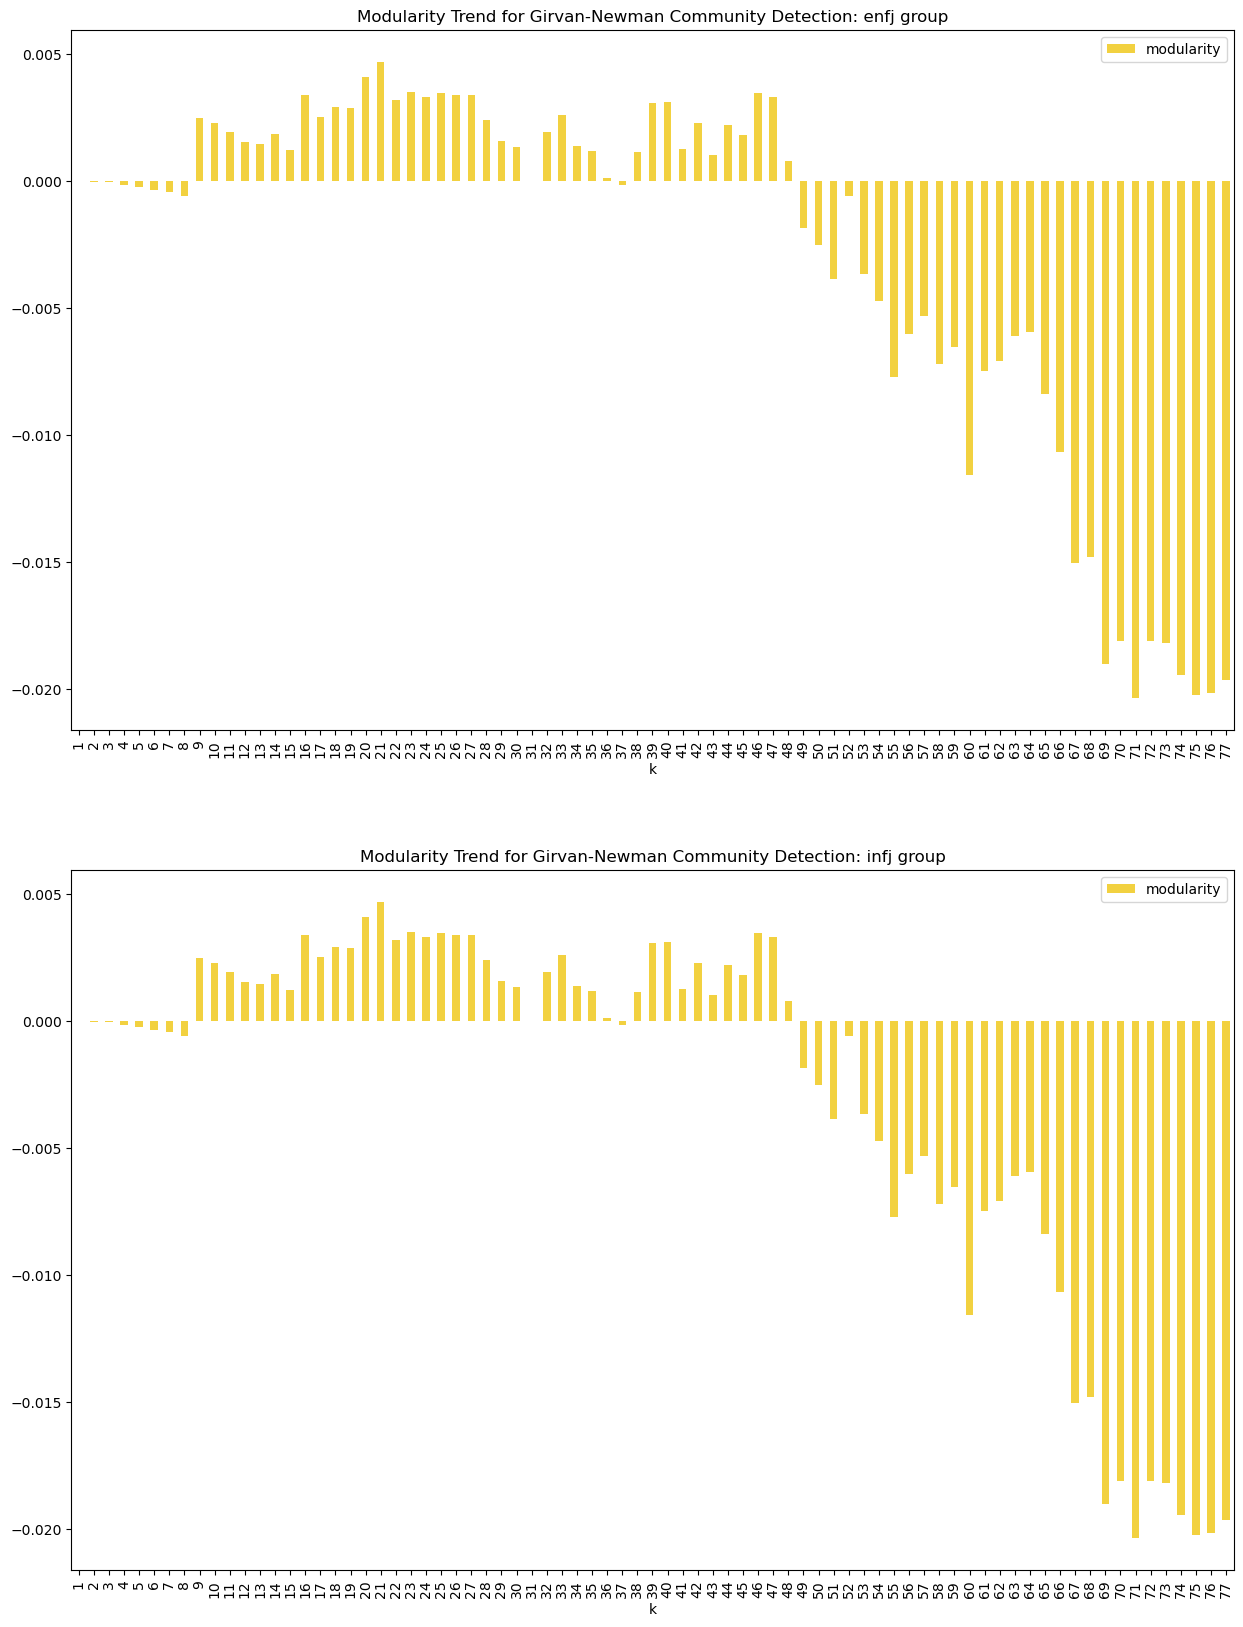

In [80]:
fig, ax = plt.subplots(2, figsize=(15, 20))

# # Plot graph with colouring based on communities
# visualize_communities(enfj_Graph, enfj_communities_list[0], 1)
# visualize_communities(enfj_Graph, enfj_communities_list[3], 2)

# Plot change in modularity as the important edges are removed
enfj_modularity_df.plot.bar(
    x="k",
    ax=ax[0],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection: enfj group",
)

enfj_modularity_df.plot.bar(
    x="k",
    ax=ax[1],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection: infj group",
)
plt.show()

### Louvain Algorithm:

In [81]:
infj_communities_list = nx.community.louvain_communities(infj_Graph, seed=123)
enfj_communities_list = nx.community.louvain_communities(enfj_Graph, seed=123)
print("Louvain's chosen 5 infj communities:", infj_communities_list)
print("\n")
print("Louvain's chosen 5 enfj communities:", enfj_communities_list)

Louvain's chosen 5 infj communities: [{'give', 'work', 'ask', 'start', 'time', 'go', 'long', 'keep', 'need', 'look', 'get'}, {'see', 'world', 'think', 'human', 'type', 'kind', 'life', 'understand', 'seem', 'like', 'help', 'post', 'find', 'share', 'relationship', 'live', 'way', 'reason'}, {'social', 'use', 'best', 'sure', 'often', 'friend', 'mode', 'fe', 'year', 'make', 'function', 'deep', 'better', 'never'}, {'u', 'enough', 'tell', 'also', 'know', 'thing', 'let', 'actual', 'person', 'say', 'even', 'good', 'talk', 'wrong', 'lot', 'want', 'right'}, {'love', 'much', 'word', 'care', 'one', 'put', 'take', 'read', 'thank'}, {'yet', 'come', 'thought', 'point', 'enjoy', 'interest', 'connect', 'heart', 'feel'}]


Louvain's chosen 5 enfj communities: [{'mode', 'know', 'point', 'seem', 'like', 'relationship', 'keep', 'person', 'see', 'social', 'use', 'friend', 'ask', 'wrong', 'lot', 'want', 'post', 'get'}, {'u', 'enough', 'tell', 'much', 'year', 'understand', 'make', 'actual', 'share', 'interest'

In [82]:
print("Louvain's chosen 5 infj communities:")
print("\n")
for i, community in enumerate(infj_communities_list):
    print("community number "+ str(i+1)+":\n")
    print(infj_communities_list[i])
    print("\n")

Louvain's chosen 5 infj communities:


community number 1:

{'give', 'work', 'ask', 'start', 'time', 'go', 'long', 'keep', 'need', 'look', 'get'}


community number 2:

{'see', 'world', 'think', 'human', 'type', 'kind', 'life', 'understand', 'seem', 'like', 'help', 'post', 'find', 'share', 'relationship', 'live', 'way', 'reason'}


community number 3:

{'social', 'use', 'best', 'sure', 'often', 'friend', 'mode', 'fe', 'year', 'make', 'function', 'deep', 'better', 'never'}


community number 4:

{'u', 'enough', 'tell', 'also', 'know', 'thing', 'let', 'actual', 'person', 'say', 'even', 'good', 'talk', 'wrong', 'lot', 'want', 'right'}


community number 5:

{'love', 'much', 'word', 'care', 'one', 'put', 'take', 'read', 'thank'}


community number 6:

{'yet', 'come', 'thought', 'point', 'enjoy', 'interest', 'connect', 'heart', 'feel'}




In [83]:
print("Louvain's chosen 5 enfj communities:")
print("\n")
for i, community in enumerate(enfj_communities_list):
    print("community number "+ str(i+1)+":\n")
    print(enfj_communities_list[i])
    print("\n")

Louvain's chosen 5 enfj communities:


community number 1:

{'mode', 'know', 'point', 'seem', 'like', 'relationship', 'keep', 'person', 'see', 'social', 'use', 'friend', 'ask', 'wrong', 'lot', 'want', 'post', 'get'}


community number 2:

{'u', 'enough', 'tell', 'much', 'year', 'understand', 'make', 'actual', 'share', 'interest', 'never', 'reason', 'even', 'yet', 'sure', 'type', 'right', 'feel'}


community number 3:

{'come', 'world', 'thank', 'work', 'fe', 'word', 'connect', 'life', 'better', 'function', 'deep', 'care', 'live', 'way'}


community number 4:

{'think', 'give', 'love', 'start', 'thing', 'one', 'time', 'put', 'need', 'best', 'often', 'human', 'thought', 'good', 'enjoy', 'find', 'help', 'look', 'long', 'also'}


community number 5:

{'let', 'talk', 'take', 'go', 'read', 'heart', 'kind', 'say'}




In [84]:
infj_louvain_modularity = nx.community.modularity(infj_Graph, infj_communities_list)
infj_louvain_modularity

0.09050144102484053

In [85]:
enfj_louvain_modularity = nx.community.modularity(enfj_Graph, enfj_communities_list)
enfj_louvain_modularity

0.13526165199200765

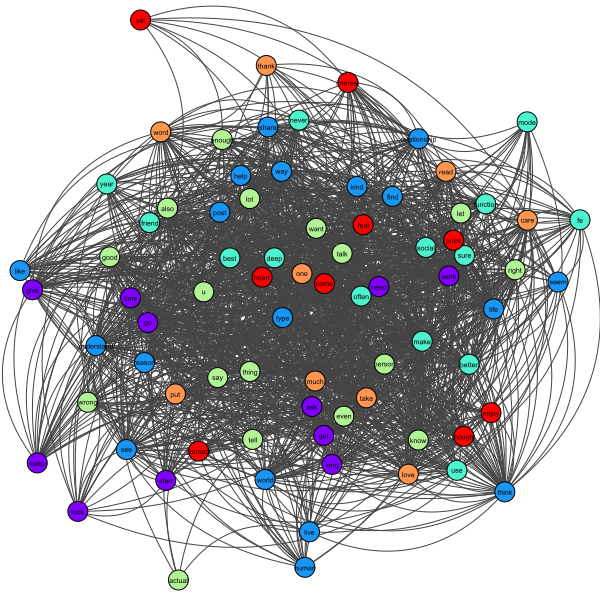

In [86]:
import igraph as ig
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Assuming `communities` is your list of communities. Each community is a list of nodes.
communities = infj_communities_list 

# Create a color for each community using a colormap
colors = cm.rainbow(np.linspace(0, 1, len(communities)))

# Convert colors to hexadecimal
hex_colors = [mcolors.rgb2hex(color) for color in colors]

# Create a color dictionary, assigning each node to the color of its community
color_dict = {}
for i, community in enumerate(communities):
    for node in community:
        color_dict[node] = hex_colors[i]

# Create a list of colors for each node in the graph, in the same order as the nodes
node_colors = [color_dict[node] for node in infj_Graph.nodes()]

# Create an iGraph object from the NetworkX graph
infj_Graph_ig = ig.Graph.from_networkx(infj_Graph)

# Get the labels for the graph
infj_labels = list(infj_Graph.nodes())

# Get the layout for the graph
layout = infj_Graph_ig.layout('drl')

# Plot the graph with node colors corresponding to communities
ig.plot(infj_Graph_ig, layout = layout, vertex_label = infj_labels, vertex_color = node_colors, vertex_size = 20, vertex_label_size = 7, edge_curved = True)


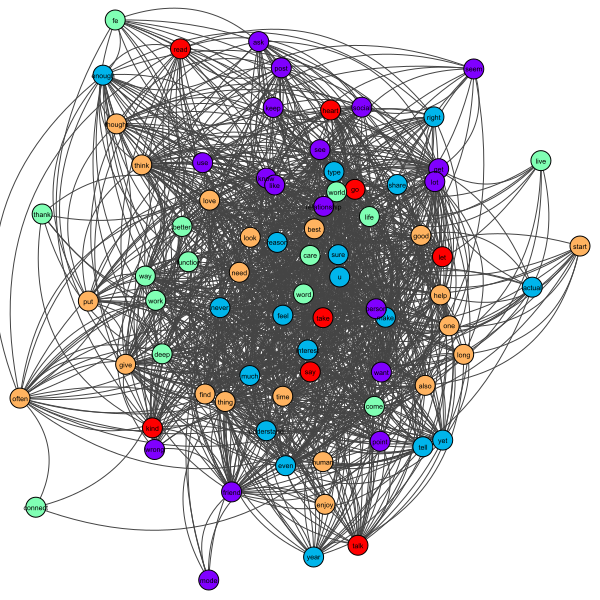

In [87]:
import igraph as ig
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np

# Assuming `communities` is your list of communities. Each community is a list of nodes.
communities = enfj_communities_list 

# Create a color for each community using a colormap
colors = cm.rainbow(np.linspace(0, 1, len(communities)))

# Convert colors to hexadecimal
hex_colors = [mcolors.rgb2hex(color) for color in colors]

# Create a color dictionary, assigning each node to the color of its community
color_dict = {}
for i, community in enumerate(communities):
    for node in community:
        color_dict[node] = hex_colors[i]

# Create a list of colors for each node in the graph, in the same order as the nodes
node_colors = [color_dict[node] for node in enfj_Graph.nodes()]

# Create an iGraph object from the NetworkX graph
enfj_Graph_ig = ig.Graph.from_networkx(enfj_Graph)

# Get the labels for the graph
enfj_labels = list(enfj_Graph.nodes())

# Get the layout for the graph
layout = enfj_Graph_ig.layout('drl')

# Plot the graph with node colors corresponding to communities
ig.plot(enfj_Graph_ig, layout = layout, vertex_label = enfj_labels, vertex_color = node_colors, vertex_size = 20, vertex_label_size = 7, edge_curved = True)


In [88]:
print("infj Community Modularity: Louvian vs GirvanNewman",infj_louvain_modularity, infj_Girvan_Newman_modularity)
print("\n")
print("enfj Community Modularity: Louvian vs GirvanNewman ",enfj_louvain_modularity, enfj_Girvan_Newman_modularity)

infj Community Modularity: Louvian vs GirvanNewman 0.09050144102484053 0.014863155022005638


enfj Community Modularity: Louvian vs GirvanNewman  0.13526165199200765 0.004689992584471796


### after trying several algorithms, we inferred that the community obtained by the Louvain Algorithm had the highest modularity score, so we picked Louvian.